In [1]:
import tensorflow as tf
print(tf.__version__)

2.8.0


In [2]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [3]:
import tensorflow as tf 

if tf.test.gpu_device_name(): 
    print('Default GPU Device:{}'.format(tf.test.gpu_device_name()))

else:
    print("Please install GPU version of TF")

Default GPU Device:/device:GPU:0


In [4]:

import os
import keras
import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential,Model
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, ZeroPadding3D , BatchNormalization, GlobalAveragePooling2D
from tensorflow.keras import Input


In [5]:
batch_size = 16
img_height = 200
img_width = 200 
NUM_CLASSES = 6

In [6]:
import pathlib
data_dir = r"C:\Users\kuric\Desktop\AI Camp\Code\Project_back\Data_aug_Unclean"
data_dir = pathlib.Path(data_dir)

In [7]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

485


In [8]:
train_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split=0.7,
    subset="training",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size,
    label_mode='categorical'
)

val_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split=0.3,
    subset="validation",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size,
    label_mode='categorical')

Found 9351 files belonging to 6 classes.
Using 2806 files for training.
Found 9351 files belonging to 6 classes.
Using 2805 files for validation.


In [9]:
class_names = train_ds.class_names
print(class_names)

['Bungarus', 'Calloselasma', 'Daboia_russelii', 'Naja', 'Ophiophagus', 'Trimeresurus']


In [10]:
# import matplotlib.pyplot as plt

# plt.figure(figsize=(10, 10))
# for images, labels in train_ds.take(1):
#     for i in range(6):
#         ax = plt.subplot(4, 4, i + 1)
#         plt.imshow(images[i].numpy().astype("uint8"))
#         plt.title(class_names[labels[i]])
#         plt.axis("off")
    


In [11]:
model = Sequential()


model_name = "EfficientNetB7_noneWeight"

pretrained_model= tf.keras.applications.EfficientNetB7(include_top=False,
                    input_shape=(img_height,img_width,3),
                    pooling='avg',classes=NUM_CLASSES)
for layer in pretrained_model.layers:
        layer.trainable=False
        


model.add(pretrained_model)
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(NUM_CLASSES, activation='softmax'))

In [12]:
pretrained_model.summary()

Model: "efficientnetb7"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 200, 200, 3  0           []                               
                                )]                                                                
                                                                                                  
 rescaling (Rescaling)          (None, 200, 200, 3)  0           ['input_1[0][0]']                
                                                                                                  
 normalization (Normalization)  (None, 200, 200, 3)  7           ['rescaling[0][0]']              
                                                                                                  
 stem_conv_pad (ZeroPadding2D)  (None, 201, 201, 3)  0           ['normalization[0][0

                                                                                                  
 block1c_bn (BatchNormalization  (None, 100, 100, 32  128        ['block1c_dwconv[0][0]']         
 )                              )                                                                 
                                                                                                  
 block1c_activation (Activation  (None, 100, 100, 32  0          ['block1c_bn[0][0]']             
 )                              )                                                                 
                                                                                                  
 block1c_se_squeeze (GlobalAver  (None, 32)          0           ['block1c_activation[0][0]']     
 agePooling2D)                                                                                    
                                                                                                  
 block1c_s

 )                                                                                                
                                                                                                  
 block2a_se_squeeze (GlobalAver  (None, 192)         0           ['block2a_activation[0][0]']     
 agePooling2D)                                                                                    
                                                                                                  
 block2a_se_reshape (Reshape)   (None, 1, 1, 192)    0           ['block2a_se_squeeze[0][0]']     
                                                                                                  
 block2a_se_reduce (Conv2D)     (None, 1, 1, 8)      1544        ['block2a_se_reshape[0][0]']     
                                                                                                  
 block2a_se_expand (Conv2D)     (None, 1, 1, 192)    1728        ['block2a_se_reduce[0][0]']      
          

                                                                                                  
 block2c_se_excite (Multiply)   (None, 50, 50, 288)  0           ['block2c_activation[0][0]',     
                                                                  'block2c_se_expand[0][0]']      
                                                                                                  
 block2c_project_conv (Conv2D)  (None, 50, 50, 48)   13824       ['block2c_se_excite[0][0]']      
                                                                                                  
 block2c_project_bn (BatchNorma  (None, 50, 50, 48)  192         ['block2c_project_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 block2c_drop (Dropout)         (None, 50, 50, 48)   0           ['block2c_project_bn[0][0]']     
          

                                                                                                  
 block2e_project_bn (BatchNorma  (None, 50, 50, 48)  192         ['block2e_project_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 block2e_drop (Dropout)         (None, 50, 50, 48)   0           ['block2e_project_bn[0][0]']     
                                                                                                  
 block2e_add (Add)              (None, 50, 50, 48)   0           ['block2e_drop[0][0]',           
                                                                  'block2d_add[0][0]']            
                                                                                                  
 block2f_expand_conv (Conv2D)   (None, 50, 50, 288)  13824       ['block2e_add[0][0]']            
          

                                                                                                  
 block2g_add (Add)              (None, 50, 50, 48)   0           ['block2g_drop[0][0]',           
                                                                  'block2f_add[0][0]']            
                                                                                                  
 block3a_expand_conv (Conv2D)   (None, 50, 50, 288)  13824       ['block2g_add[0][0]']            
                                                                                                  
 block3a_expand_bn (BatchNormal  (None, 50, 50, 288)  1152       ['block3a_expand_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 block3a_expand_activation (Act  (None, 50, 50, 288)  0          ['block3a_expand_bn[0][0]']      
 ivation) 

 ization)                                                                                         
                                                                                                  
 block3c_expand_activation (Act  (None, 25, 25, 480)  0          ['block3c_expand_bn[0][0]']      
 ivation)                                                                                         
                                                                                                  
 block3c_dwconv (DepthwiseConv2  (None, 25, 25, 480)  12000      ['block3c_expand_activation[0][0]
 D)                                                              ']                               
                                                                                                  
 block3c_bn (BatchNormalization  (None, 25, 25, 480)  1920       ['block3c_dwconv[0][0]']         
 )                                                                                                
          

 block3e_dwconv (DepthwiseConv2  (None, 25, 25, 480)  12000      ['block3e_expand_activation[0][0]
 D)                                                              ']                               
                                                                                                  
 block3e_bn (BatchNormalization  (None, 25, 25, 480)  1920       ['block3e_dwconv[0][0]']         
 )                                                                                                
                                                                                                  
 block3e_activation (Activation  (None, 25, 25, 480)  0          ['block3e_bn[0][0]']             
 )                                                                                                
                                                                                                  
 block3e_se_squeeze (GlobalAver  (None, 480)         0           ['block3e_activation[0][0]']     
 agePoolin

                                                                                                  
 block3g_activation (Activation  (None, 25, 25, 480)  0          ['block3g_bn[0][0]']             
 )                                                                                                
                                                                                                  
 block3g_se_squeeze (GlobalAver  (None, 480)         0           ['block3g_activation[0][0]']     
 agePooling2D)                                                                                    
                                                                                                  
 block3g_se_reshape (Reshape)   (None, 1, 1, 480)    0           ['block3g_se_squeeze[0][0]']     
                                                                                                  
 block3g_se_reduce (Conv2D)     (None, 1, 1, 20)     9620        ['block3g_se_reshape[0][0]']     
          

 block4b_se_reshape (Reshape)   (None, 1, 1, 960)    0           ['block4b_se_squeeze[0][0]']     
                                                                                                  
 block4b_se_reduce (Conv2D)     (None, 1, 1, 40)     38440       ['block4b_se_reshape[0][0]']     
                                                                                                  
 block4b_se_expand (Conv2D)     (None, 1, 1, 960)    39360       ['block4b_se_reduce[0][0]']      
                                                                                                  
 block4b_se_excite (Multiply)   (None, 13, 13, 960)  0           ['block4b_activation[0][0]',     
                                                                  'block4b_se_expand[0][0]']      
                                                                                                  
 block4b_project_conv (Conv2D)  (None, 13, 13, 160)  153600      ['block4b_se_excite[0][0]']      
          

                                                                                                  
 block4d_se_excite (Multiply)   (None, 13, 13, 960)  0           ['block4d_activation[0][0]',     
                                                                  'block4d_se_expand[0][0]']      
                                                                                                  
 block4d_project_conv (Conv2D)  (None, 13, 13, 160)  153600      ['block4d_se_excite[0][0]']      
                                                                                                  
 block4d_project_bn (BatchNorma  (None, 13, 13, 160)  640        ['block4d_project_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 block4d_drop (Dropout)         (None, 13, 13, 160)  0           ['block4d_project_bn[0][0]']     
          

                                                                                                  
 block4f_project_bn (BatchNorma  (None, 13, 13, 160)  640        ['block4f_project_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 block4f_drop (Dropout)         (None, 13, 13, 160)  0           ['block4f_project_bn[0][0]']     
                                                                                                  
 block4f_add (Add)              (None, 13, 13, 160)  0           ['block4f_drop[0][0]',           
                                                                  'block4e_add[0][0]']            
                                                                                                  
 block4g_expand_conv (Conv2D)   (None, 13, 13, 960)  153600      ['block4f_add[0][0]']            
          

                                                                                                  
 block4h_add (Add)              (None, 13, 13, 160)  0           ['block4h_drop[0][0]',           
                                                                  'block4g_add[0][0]']            
                                                                                                  
 block4i_expand_conv (Conv2D)   (None, 13, 13, 960)  153600      ['block4h_add[0][0]']            
                                                                                                  
 block4i_expand_bn (BatchNormal  (None, 13, 13, 960)  3840       ['block4i_expand_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 block4i_expand_activation (Act  (None, 13, 13, 960)  0          ['block4i_expand_bn[0][0]']      
 ivation) 

                                                                                                  
 block5a_expand_bn (BatchNormal  (None, 13, 13, 960)  3840       ['block5a_expand_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 block5a_expand_activation (Act  (None, 13, 13, 960)  0          ['block5a_expand_bn[0][0]']      
 ivation)                                                                                         
                                                                                                  
 block5a_dwconv (DepthwiseConv2  (None, 13, 13, 960)  24000      ['block5a_expand_activation[0][0]
 D)                                                              ']                               
                                                                                                  
 block5a_b

 D)                             )                                ']                               
                                                                                                  
 block5c_bn (BatchNormalization  (None, 13, 13, 1344  5376       ['block5c_dwconv[0][0]']         
 )                              )                                                                 
                                                                                                  
 block5c_activation (Activation  (None, 13, 13, 1344  0          ['block5c_bn[0][0]']             
 )                              )                                                                 
                                                                                                  
 block5c_se_squeeze (GlobalAver  (None, 1344)        0           ['block5c_activation[0][0]']     
 agePooling2D)                                                                                    
          

 )                              )                                                                 
                                                                                                  
 block5e_activation (Activation  (None, 13, 13, 1344  0          ['block5e_bn[0][0]']             
 )                              )                                                                 
                                                                                                  
 block5e_se_squeeze (GlobalAver  (None, 1344)        0           ['block5e_activation[0][0]']     
 agePooling2D)                                                                                    
                                                                                                  
 block5e_se_reshape (Reshape)   (None, 1, 1, 1344)   0           ['block5e_se_squeeze[0][0]']     
                                                                                                  
 block5e_s

 )                              )                                                                 
                                                                                                  
 block5g_se_squeeze (GlobalAver  (None, 1344)        0           ['block5g_activation[0][0]']     
 agePooling2D)                                                                                    
                                                                                                  
 block5g_se_reshape (Reshape)   (None, 1, 1, 1344)   0           ['block5g_se_squeeze[0][0]']     
                                                                                                  
 block5g_se_reduce (Conv2D)     (None, 1, 1, 56)     75320       ['block5g_se_reshape[0][0]']     
                                                                                                  
 block5g_se_expand (Conv2D)     (None, 1, 1, 1344)   76608       ['block5g_se_reduce[0][0]']      
          

 agePooling2D)                                                                                    
                                                                                                  
 block5i_se_reshape (Reshape)   (None, 1, 1, 1344)   0           ['block5i_se_squeeze[0][0]']     
                                                                                                  
 block5i_se_reduce (Conv2D)     (None, 1, 1, 56)     75320       ['block5i_se_reshape[0][0]']     
                                                                                                  
 block5i_se_expand (Conv2D)     (None, 1, 1, 1344)   76608       ['block5i_se_reduce[0][0]']      
                                                                                                  
 block5i_se_excite (Multiply)   (None, 13, 13, 1344  0           ['block5i_activation[0][0]',     
                                )                                 'block5i_se_expand[0][0]']      
          

 agePooling2D)                                                                                    
                                                                                                  
 block6a_se_reshape (Reshape)   (None, 1, 1, 1344)   0           ['block6a_se_squeeze[0][0]']     
                                                                                                  
 block6a_se_reduce (Conv2D)     (None, 1, 1, 56)     75320       ['block6a_se_reshape[0][0]']     
                                                                                                  
 block6a_se_expand (Conv2D)     (None, 1, 1, 1344)   76608       ['block6a_se_reduce[0][0]']      
                                                                                                  
 block6a_se_excite (Multiply)   (None, 7, 7, 1344)   0           ['block6a_activation[0][0]',     
                                                                  'block6a_se_expand[0][0]']      
          

                                                                                                  
 block6c_project_conv (Conv2D)  (None, 7, 7, 384)    884736      ['block6c_se_excite[0][0]']      
                                                                                                  
 block6c_project_bn (BatchNorma  (None, 7, 7, 384)   1536        ['block6c_project_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 block6c_drop (Dropout)         (None, 7, 7, 384)    0           ['block6c_project_bn[0][0]']     
                                                                                                  
 block6c_add (Add)              (None, 7, 7, 384)    0           ['block6c_drop[0][0]',           
                                                                  'block6b_add[0][0]']            
          

                                                                                                  
 block6e_drop (Dropout)         (None, 7, 7, 384)    0           ['block6e_project_bn[0][0]']     
                                                                                                  
 block6e_add (Add)              (None, 7, 7, 384)    0           ['block6e_drop[0][0]',           
                                                                  'block6d_add[0][0]']            
                                                                                                  
 block6f_expand_conv (Conv2D)   (None, 7, 7, 2304)   884736      ['block6e_add[0][0]']            
                                                                                                  
 block6f_expand_bn (BatchNormal  (None, 7, 7, 2304)  9216        ['block6f_expand_conv[0][0]']    
 ization)                                                                                         
          

                                                                                                  
 block6h_expand_conv (Conv2D)   (None, 7, 7, 2304)   884736      ['block6g_add[0][0]']            
                                                                                                  
 block6h_expand_bn (BatchNormal  (None, 7, 7, 2304)  9216        ['block6h_expand_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 block6h_expand_activation (Act  (None, 7, 7, 2304)  0           ['block6h_expand_bn[0][0]']      
 ivation)                                                                                         
                                                                                                  
 block6h_dwconv (DepthwiseConv2  (None, 7, 7, 2304)  57600       ['block6h_expand_activation[0][0]
 D)       

                                                                                                  
 block6j_expand_activation (Act  (None, 7, 7, 2304)  0           ['block6j_expand_bn[0][0]']      
 ivation)                                                                                         
                                                                                                  
 block6j_dwconv (DepthwiseConv2  (None, 7, 7, 2304)  57600       ['block6j_expand_activation[0][0]
 D)                                                              ']                               
                                                                                                  
 block6j_bn (BatchNormalization  (None, 7, 7, 2304)  9216        ['block6j_dwconv[0][0]']         
 )                                                                                                
                                                                                                  
 block6j_a

 D)                                                              ']                               
                                                                                                  
 block6l_bn (BatchNormalization  (None, 7, 7, 2304)  9216        ['block6l_dwconv[0][0]']         
 )                                                                                                
                                                                                                  
 block6l_activation (Activation  (None, 7, 7, 2304)  0           ['block6l_bn[0][0]']             
 )                                                                                                
                                                                                                  
 block6l_se_squeeze (GlobalAver  (None, 2304)        0           ['block6l_activation[0][0]']     
 agePooling2D)                                                                                    
          

 block7a_activation (Activation  (None, 7, 7, 2304)  0           ['block7a_bn[0][0]']             
 )                                                                                                
                                                                                                  
 block7a_se_squeeze (GlobalAver  (None, 2304)        0           ['block7a_activation[0][0]']     
 agePooling2D)                                                                                    
                                                                                                  
 block7a_se_reshape (Reshape)   (None, 1, 1, 2304)   0           ['block7a_se_squeeze[0][0]']     
                                                                                                  
 block7a_se_reduce (Conv2D)     (None, 1, 1, 96)     221280      ['block7a_se_reshape[0][0]']     
                                                                                                  
 block7a_s

 block7c_se_expand (Conv2D)     (None, 1, 1, 3840)   618240      ['block7c_se_reduce[0][0]']      
                                                                                                  
 block7c_se_excite (Multiply)   (None, 7, 7, 3840)   0           ['block7c_activation[0][0]',     
                                                                  'block7c_se_expand[0][0]']      
                                                                                                  
 block7c_project_conv (Conv2D)  (None, 7, 7, 640)    2457600     ['block7c_se_excite[0][0]']      
                                                                                                  
 block7c_project_bn (BatchNorma  (None, 7, 7, 640)   2560        ['block7c_project_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 block7c_d

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetb7 (Functional)  (None, 2560)             64097687  
                                                                 
 flatten (Flatten)           (None, 2560)              0         
                                                                 
 dense (Dense)               (None, 512)               1311232   
                                                                 
 dense_1 (Dense)             (None, 6)                 3078      
                                                                 
Total params: 65,411,997
Trainable params: 1,314,310
Non-trainable params: 64,097,687
_________________________________________________________________


In [14]:
from tensorflow.keras.optimizers import Adam

learningRate = 0.00001
loss_function = "categorical_crossentropy"
model.compile(optimizer=Adam(learning_rate=learningRate),
               loss=loss_function,
               metrics=['accuracy'])

################################################
nb_epochs=50
################################################


In [15]:
# #  Train  with backup h5 every epoch. #####################


# checkpoint_path = r"./ModelSaving/{epoch:04d}.h5"
# checkpoint_dir = os.path.dirname(checkpoint_path)
# cp_callback = tf.keras.callbacks.ModelCheckpoint(
#     checkpoint_path, verbose=1, save_weights_only=False,
#     # Save weights, every epoch.
#     save_freq='epoch'
# )
# resnet_model.save(checkpoint_path.format(epoch=0))
# vg = validation_generator
# history = resnet_model.fit( train_generator, validation_data=vg ,epochs=nb_epochs, callbacks = [cp_callback])

In [16]:
history = model.fit( train_ds, validation_data=val_ds ,epochs=nb_epochs )

Epoch 1/50
176/176 [==============================] - 58s 253ms/step - loss: 1.4705 - accuracy: 0.5445 - val_loss: 1.1837 - val_accuracy: 0.7055
Epoch 2/50
176/176 [==============================] - 42s 241ms/step - loss: 1.0376 - accuracy: 0.7377 - val_loss: 0.8752 - val_accuracy: 0.7711
Epoch 3/50
176/176 [==============================] - 45s 255ms/step - loss: 0.8135 - accuracy: 0.7844 - val_loss: 0.7118 - val_accuracy: 0.8050
Epoch 4/50
176/176 [==============================] - 44s 250ms/step - loss: 0.6726 - accuracy: 0.8207 - val_loss: 0.6123 - val_accuracy: 0.8242
Epoch 5/50
176/176 [==============================] - 43s 243ms/step - loss: 0.5901 - accuracy: 0.8350 - val_loss: 0.5464 - val_accuracy: 0.8421
Epoch 6/50
176/176 [==============================] - 43s 246ms/step - loss: 0.5308 - accuracy: 0.8528 - val_loss: 0.4968 - val_accuracy: 0.8556
Epoch 7/50
176/176 [==============================] - 43s 246ms/step - loss: 0.4767 - accuracy: 0.8635 - val_loss: 0.4579 - val_ac

Model = EfficientNetB7_noneWeight
Epochs = 50
Image Size = 200
Batch = 16
learningRate = 1e-05


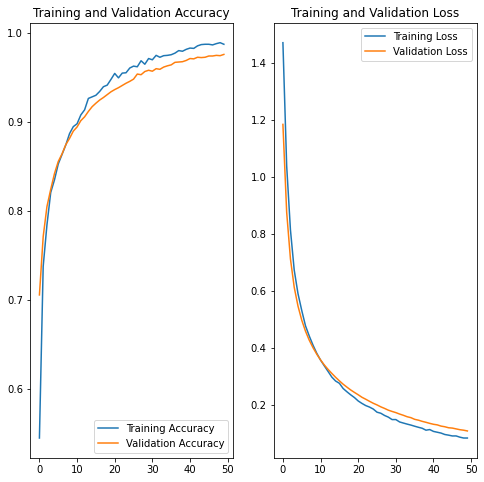

In [17]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(nb_epochs)

print("Model = "+model_name)
print("Epochs = {}".format(nb_epochs))
print("Image Size = {}".format(img_width))
print("Batch = {}".format(batch_size))
print("learningRate = {}".format(learningRate))
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')

#####  use this  to save train graph as png #####################
from datetime import datetime
dt = datetime.now()
ts = datetime.timestamp(dt)
date_time = datetime.fromtimestamp(ts)
str_date_time = date_time.strftime("%d-%m-%Y_%H-%M")
graph_path = r'./experimentData/graph'
if( not (os.path.exists(graph_path)) ) :
    os.mkdir(graph_path)
plt.savefig(graph_path+'/'+str_date_time+".png")  
#####  use this  to save train graph as png #####################

plt.show()


graph_path = graph_path+'/'+str_date_time+".png"


In [18]:
model.save(r"./ModelSaving/FinalModel_"+model_name+".h5")

In [19]:
import pandas as pd
import os

from datetime import datetime
dt = datetime.now()
ts = datetime.timestamp(dt)
date_time = datetime.fromtimestamp(ts)
str_date_time = date_time.strftime("%d/%m/%Y, %H:%M")



############################# List that var should be defined   
############################# รายชื่อตัวแปร ที่ควรสร้าง และใส่ค่า 
varList = {"model_name",   ### name of model
           "nb_epochs",     ### number of epochs
           "batch_size",    ###  batch size
           "learningRate",  ### learning rate
           "accuracy",       ###  accuracy of model
           "val_accuracy",  ### val_accuracy  of model
           "loss",          ### loss  of model
           "val_loss",      ### val_loss  of model
           "loss_function", ### lossfunction name    Must be str
           "graph_path",    ###  path to graph dir
           "exp_dataset",  ###  explain about dataset
           "other_comment"}  ###  option  for comment
#############################





pathDir = r'./experimentData'
path = r'./experimentData/Experiment.csv'

ExpDict = {
            'Date': [],
            'ModelName': [],
            'Epochs' : [],
            'ImageSize' : [],
            'Batch': [],
            'LearningRate' : [],
            'Accuracy' : [],
            'valAccuracy': [],
            'loss' : [],
            'valLoss' : [],
            'lossFunction' : [],
            'GraphPath' : [],
            'ExpDataSet' : [],
            'otherComment' : []
             }

if(not (os.path.exists(path))) :
    dt = pd.DataFrame(ExpDict)
    if( not (os.path.exists(pathDir)) ) :
            os.mkdir(pathDir)
    dt.to_csv(path,na_rep='',float_format='%.2f',index=False)

expExel = pd.read_csv(path)

for var in varList :
    if not(var in globals()):
        exec(var + " = ''")

        
ExpDict["Date"] = str_date_time
ExpDict["ModelName"] = model_name
ExpDict["Epochs"] = str(nb_epochs)
if ("img_height" in globals()) and  ("img_width" in globals()):
    ExpDict["ImageSize"] = str("HeightWidth = {}*{}".format(img_height,img_width))
elif ("img_size" in globals()):
    ExpDict["ImageSize"] = str("ImageSize = {}".format(img_size))
else :
    ExpDict["ImageSize"] = ""
ExpDict["Batch"] = str(batch_size)
ExpDict["LearningRate"] = str(learningRate)
ExpDict["Accuracy"] = str(acc)
ExpDict["valAccuracy"] = str(val_acc)
ExpDict["loss"] = str(loss)
ExpDict["valLoss"] = str(val_loss)
ExpDict["lossFunction"] = loss_function
ExpDict["GraphPath"] = graph_path
ExpDict["ExpDataSet"] = exp_dataset
ExpDict["otherComment"] = other_comment





In [20]:
###  บันทึกทับลง exel
expExel = expExel.append(ExpDict,ignore_index=True)
expExel.to_csv(path,na_rep='',float_format='%.2f',index=False)

C:\Users\kuric\AppData\Local\Temp\ipykernel_6296\2187488631.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  expExel = expExel.append(ExpDict,ignore_index=True)
